In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('../data/01_data_cleaned.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Event,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Not a holiday,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl Week,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Not a holiday,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Not a holiday,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Not a holiday,5,3,2010


In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Event', 'day', 'month',
       'year'],
      dtype='object')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Week of month calculation
df['week_of_month'] = df['Date'].apply(lambda d: min((d.day - 1) // 7 + 1, 4))
df['week_number'] = df['Date'].dt.isocalendar().week

# Example: see the first few
df[['Date', 'week_of_month', 'week_number']].head()

,Date,week_of_month,week_number
0,2010-02-05,1,5
1,2010-02-12,2,6
2,2010-02-19,3,7
3,2010-02-26,4,8
4,2010-03-05,1,9


# Defining KPIs:

## 1. Total Weekly Sales:

In [6]:
sales_per_week = df.groupby(['week_number'])['Weekly_Sales'].mean().round(3).sort_values(ascending=False).reset_index()

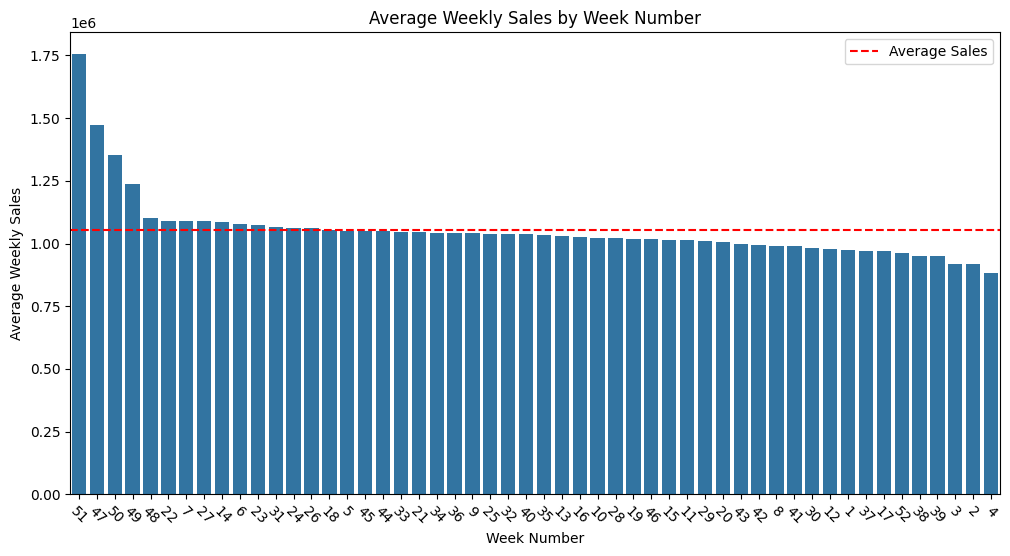

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='week_number', y='Weekly_Sales', data=sales_per_week, order=sales_per_week['week_number'])
plt.title('Average Weekly Sales by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=-45)
plt.axhline(y=sales_per_week['Weekly_Sales'].mean(), color='r', linestyle='--', label='Average Sales')
plt.legend()
plt.show()

This trend is as expected from the previous EDA graphs, the sales at the end of the year is very high compared to the rest of the days of the year. This is because 51th week is christmas week, where people buys a lot.

`There's a higher chance of increasing sales at the year-end.`

### Total sales in Nov and Dec per week:

In [8]:
later_week_sales = df[df['week_number'].isin([1, 2, 44, 45, 46, 47, 48, 49, 50, 51, 52])][['year', 'month', 'week_number', 'Weekly_Sales']].groupby(['year', 'month', 'week_number']).sum().reset_index().round()
later_week_sales

,year,month,week_number,Weekly_Sales
0,2010,11,44,45781982.0
1,2010,11,45,46124801.0
2,2010,11,46,45125584.0
3,2010,11,47,65821003.0
4,2010,12,48,49909028.0
5,2010,12,49,55666770.0
6,2010,12,50,61820800.0
7,2010,12,51,80931416.0
8,2010,12,52,40432519.0
9,2011,1,1,42775788.0


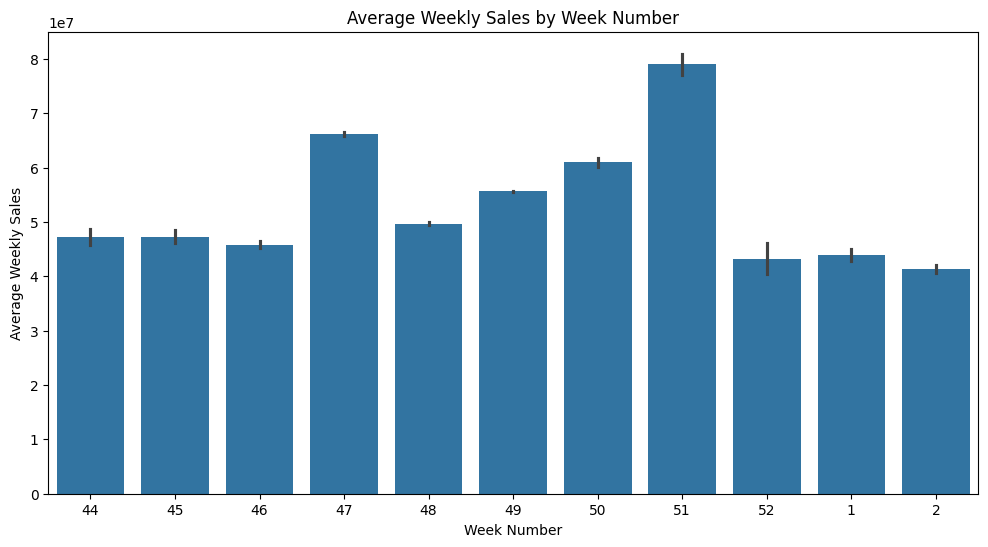

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='week_number', y='Weekly_Sales', data=later_week_sales, order=later_week_sales['week_number'])
plt.title('Average Weekly Sales by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Average Weekly Sales')
plt.show()

In November, major sales are in the last week, around Thanksgiving. 

Dec has overall more sales compared to Nov or any other month, and most of those sales come from the second last week, most likely christmas week. Plus, even in the 5th week (29-31) there's a lot of sales, most likely for new year shopping. But then the sales come to normal in Jan.

`Therefore, the weeks where we can increase our sales are weeks 47, 49, 50, 51. (Also, week 52 which includes some days of Dec and some days of early Jan.)`

## 2. Average Weekly Sales per Store:

In [21]:
sales_per_store = df.groupby(['year', 'Store'])['Weekly_Sales'].mean().round().sort_values(ascending=False).reset_index()
sales_per_store

,year,Store,Weekly_Sales
0,2010,14,2197130.0
1,2012,4,2157470.0
2,2011,4,2136390.0
3,2010,20,2119439.0
4,2011,20,2112250.0
...,...,...,...
130,2011,44,298042.0
131,2010,44,283490.0
132,2010,33,265976.0
133,2012,33,265943.0


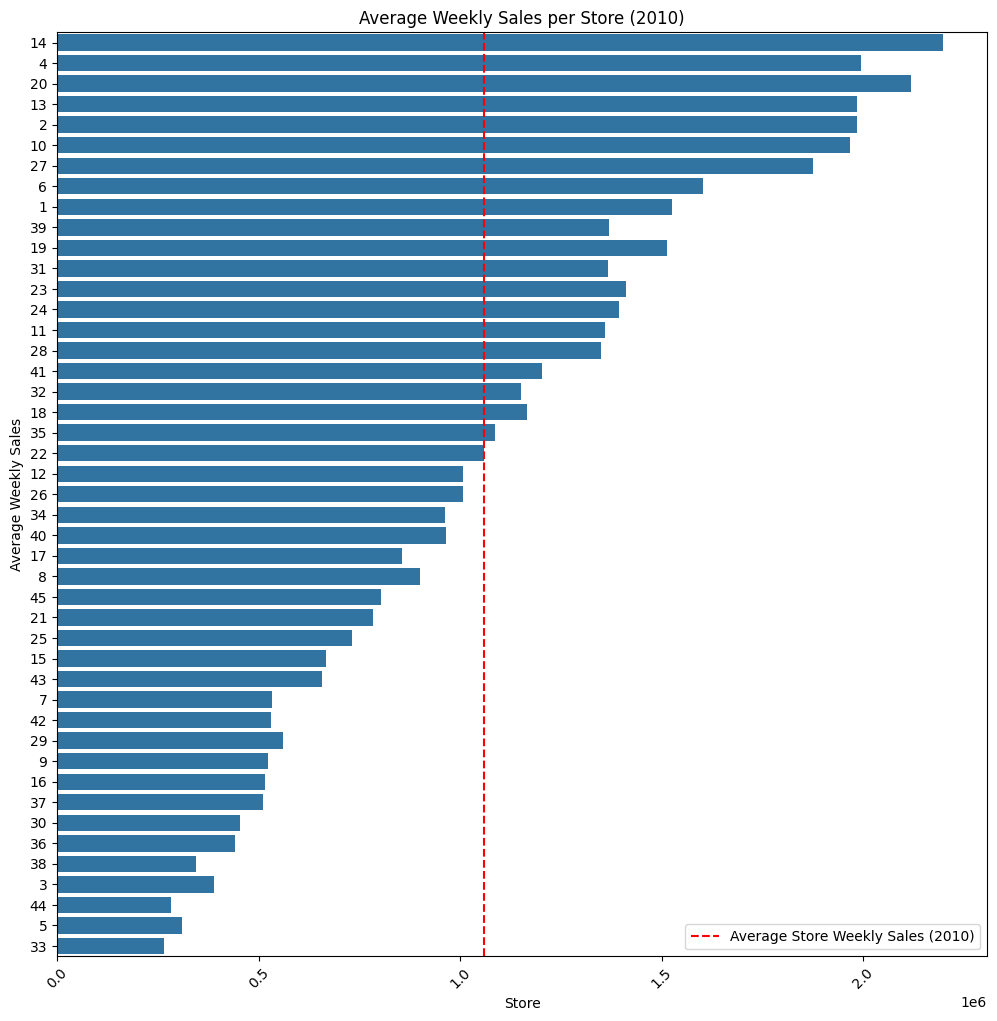

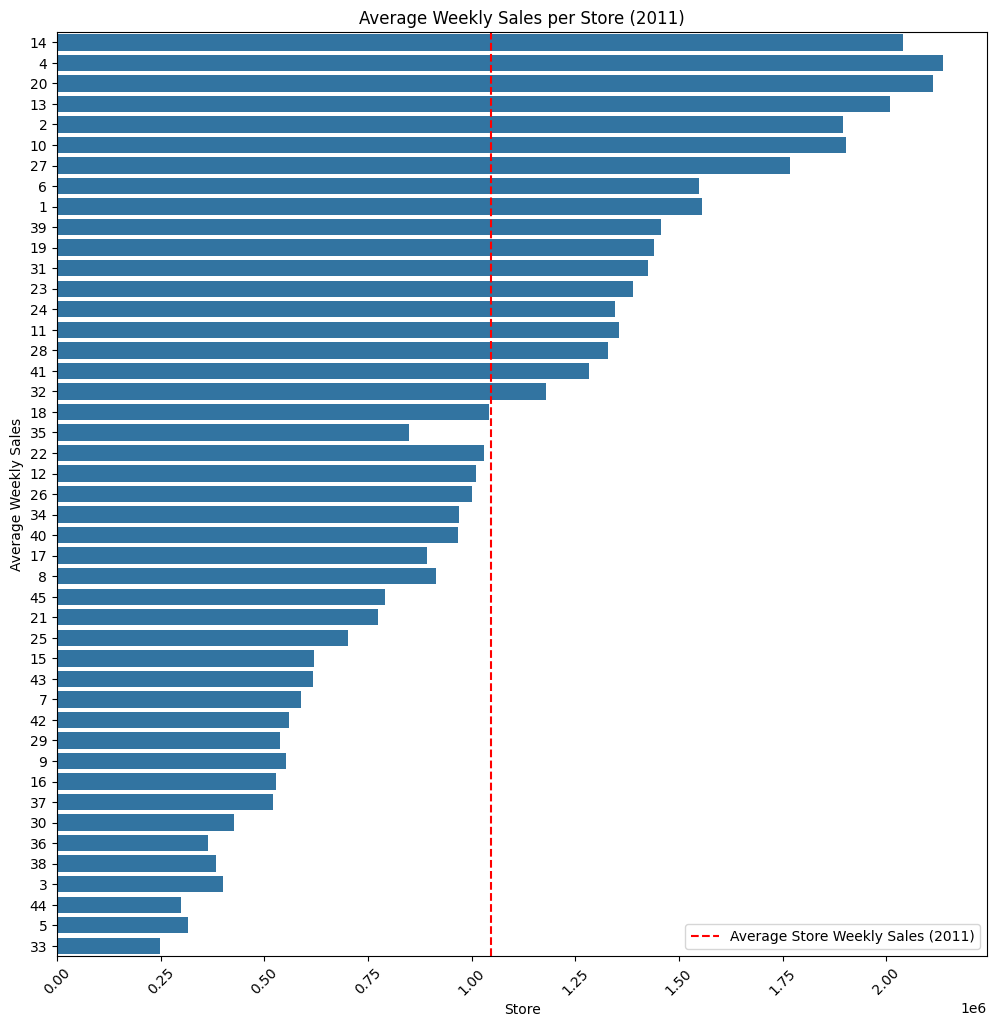

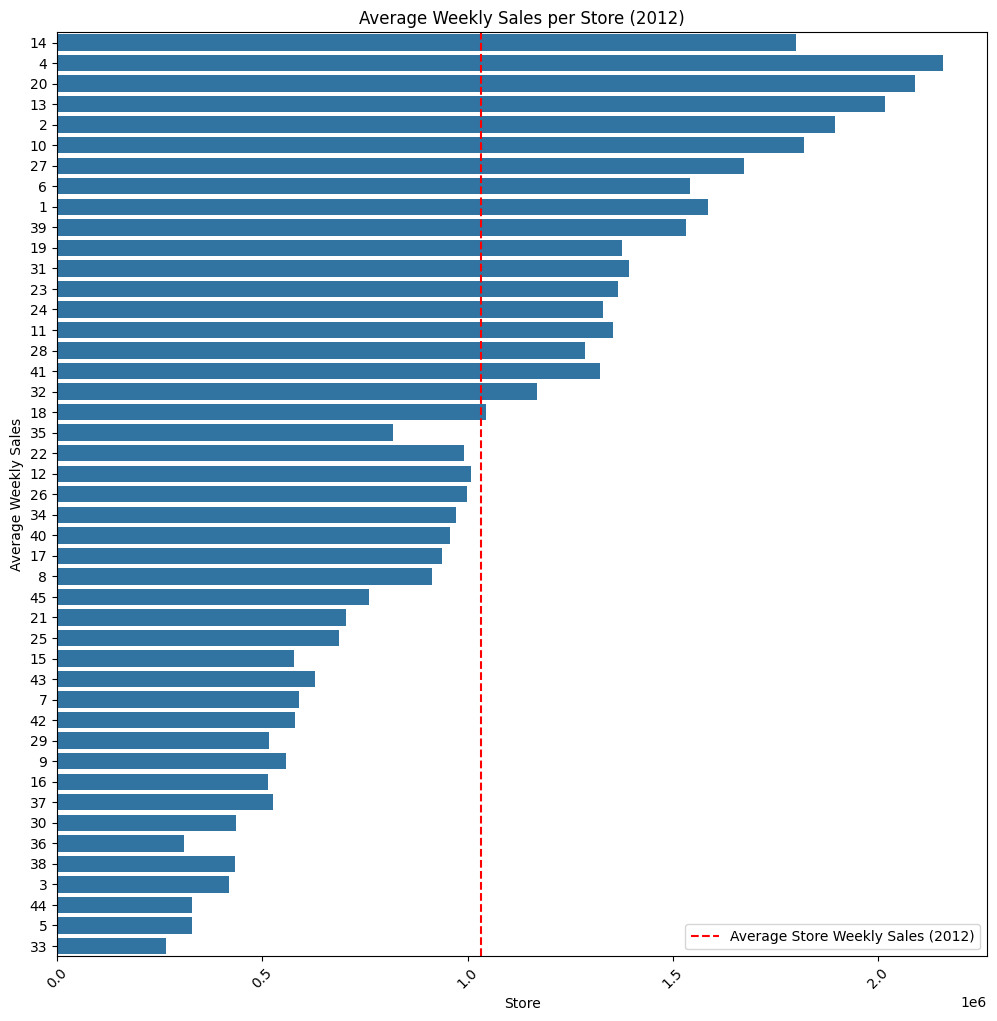

In [23]:
# 2010
plt.figure(figsize=(12, 12))
sns.barplot(x='Weekly_Sales', y='Store', data=sales_per_store[sales_per_store['year'] == 2010], order=sales_per_store['Store'], orient='h')
plt.title('Average Weekly Sales per Store (2010)')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.axvline(x=sales_per_store[sales_per_store['year'] == 2010]['Weekly_Sales'].mean(), color='r', linestyle='--', label='Average Store Weekly Sales (2010)')
plt.legend()
plt.show()

# 2011
plt.figure(figsize=(12, 12))
sns.barplot(x='Weekly_Sales', y='Store', data=sales_per_store[sales_per_store['year'] == 2011], order=sales_per_store['Store'], orient='h')
plt.title('Average Weekly Sales per Store (2011)')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.axvline(x=sales_per_store[sales_per_store['year'] == 2011]['Weekly_Sales'].mean(), color='r', linestyle='--', label='Average Store Weekly Sales (2011)')
plt.legend()
plt.show()

# 2012
plt.figure(figsize=(12, 12))
sns.barplot(x='Weekly_Sales', y='Store', data=sales_per_store[sales_per_store['year'] == 2012], order=sales_per_store['Store'], orient='h')
plt.title('Average Weekly Sales per Store (2012)')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.axvline(x=sales_per_store[sales_per_store['year'] == 2012]['Weekly_Sales'].mean(), color='r', linestyle='--', label='Average Store Weekly Sales (2012)')
plt.legend()
plt.show()

The top performing stores are: 4, 14, 20, 13, 2 and 10.

Store 14 had the highest avg sales in 2010 and 2011, but it dropped significantly in 2012.

In [30]:
top_stores = sales_per_store[sales_per_store['Store'].isin([4, 14, 20, 10, 13, 2])]
top_store_sales = top_stores.groupby(['Store', 'year'])['Weekly_Sales'].mean().reset_index()
top_store_sales

,Store,year,Weekly_Sales
0,2,2010,1984956.0
1,2,2011,1896305.0
2,2,2012,1895272.0
3,4,2010,1993343.0
4,4,2011,2136390.0
5,4,2012,2157470.0
6,10,2010,1968171.0
7,10,2011,1902248.0
8,10,2012,1819270.0
9,13,2010,1984849.0


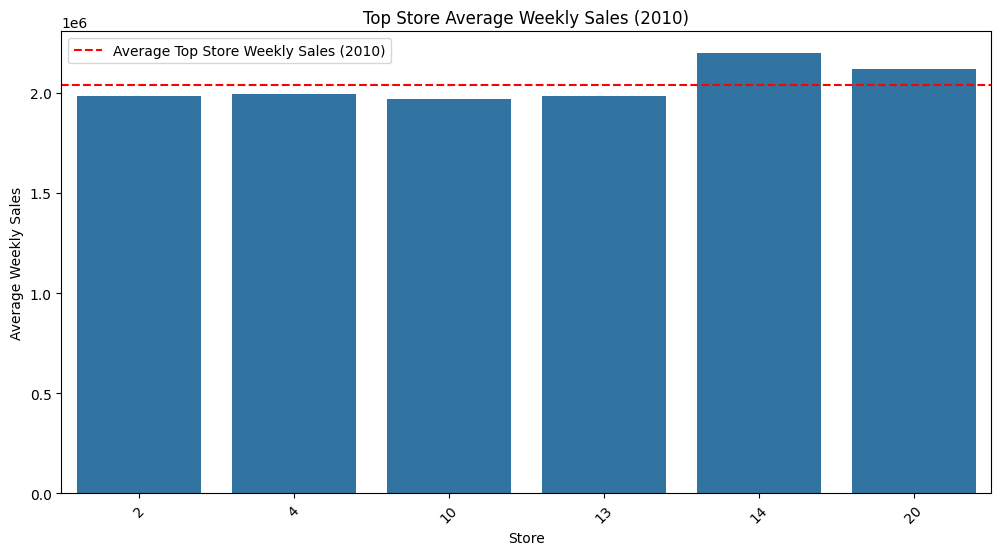

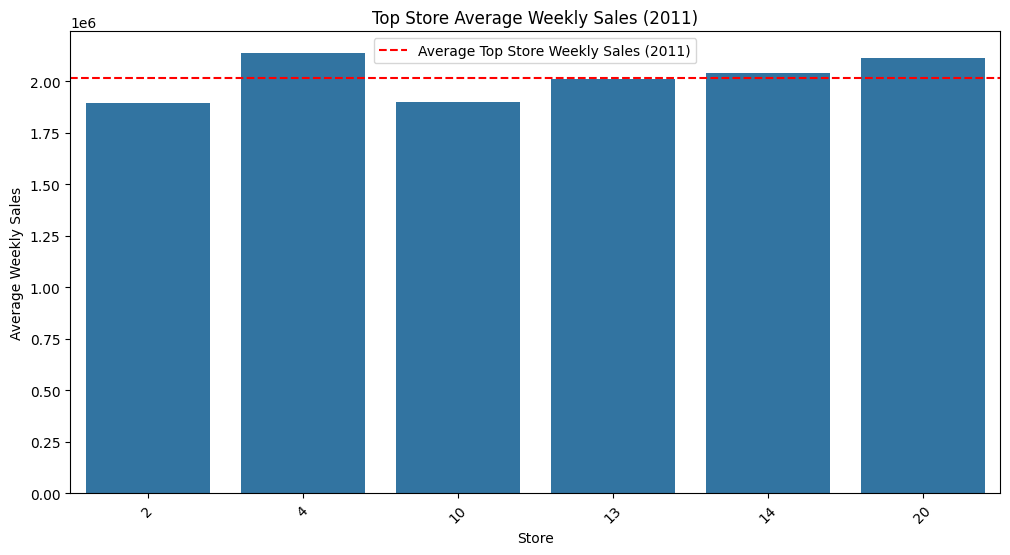

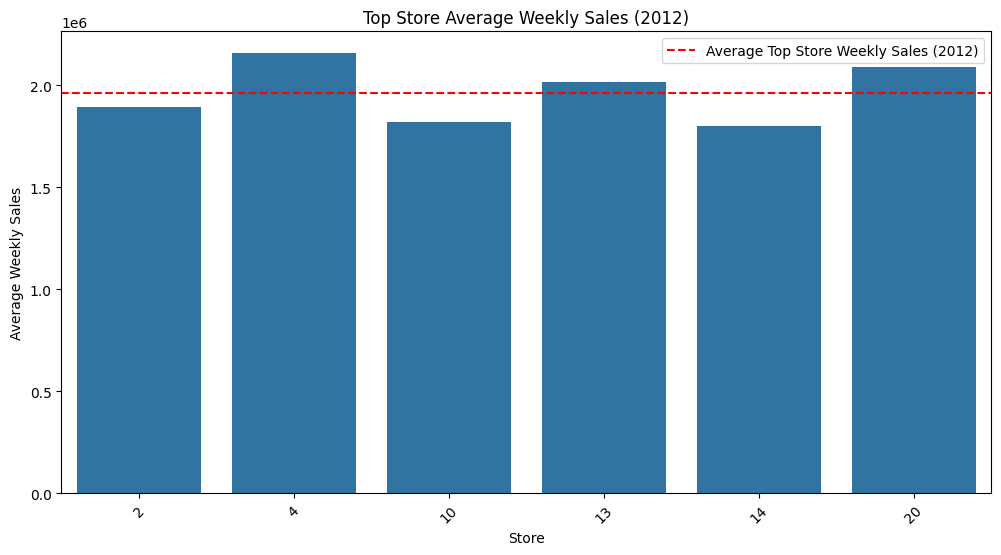

In [32]:
# 2010
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_store_sales[top_store_sales['year'] == 2010], order=top_store_sales['Store'])
plt.title('Top Store Average Weekly Sales (2010)')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.axhline(y=top_store_sales[top_store_sales['year'] == 2010]['Weekly_Sales'].mean(), color='r', linestyle='--', label='Average Top Store Weekly Sales (2010)')
plt.legend()
plt.show()

# 2011
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_store_sales[top_store_sales['year'] == 2011], order=top_store_sales['Store'])
plt.title('Top Store Average Weekly Sales (2011)')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.axhline(y=top_store_sales[top_store_sales['year'] == 2011]['Weekly_Sales'].mean(), color='r', linestyle='--', label='Average Top Store Weekly Sales (2011)')
plt.legend()
plt.show()

# 2012
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_store_sales[top_store_sales['year'] == 2012], order=top_store_sales['Store'])
plt.title('Top Store Average Weekly Sales (2012)')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.axhline(y=top_store_sales[top_store_sales['year'] == 2012]['Weekly_Sales'].mean(), color='r', linestyle='--', label='Average Top Store Weekly Sales (2012)')
plt.legend()
plt.show()

In [34]:
print('Average Weekly Sales for all Stores in 2010:', sales_per_store[sales_per_store['year'] == 2010]['Weekly_Sales'].mean().round())
print('Average Weekly Sales for all Stores in 2011:', sales_per_store[sales_per_store['year'] == 2011]['Weekly_Sales'].mean().round())
print('Average Weekly Sales for all Stores in 2012:', sales_per_store[sales_per_store['year'] == 2012]['Weekly_Sales'].mean().round())

Average Weekly Sales for all Stores in 2010: 1059669.0
Average Weekly Sales for all Stores in 2011: 1046239.0
Average Weekly Sales for all Stores in 2012: 1033660.0


However, the average sales per store is decreasing.